Hierarchical - Coeficiente de Silhouette: 0.350052258439455
Hierarchical - Índice de Calinski-Harabasz: 92.3620333292192


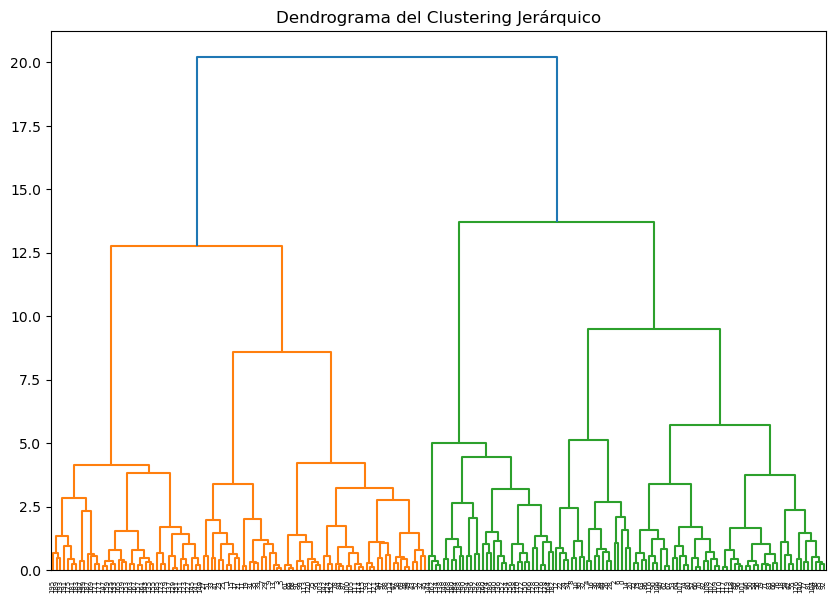

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Cargar datos
data = pd.read_csv('Mall_Customers.csv')

# Preprocesamiento
# Eliminar outliers
for column in ['Annual Income (k$)', 'Spending Score (1-100)']:
    percentiles = data[column].quantile([0.01, 0.99]).values
    data[column] = data[column].clip(lower=percentiles[0], upper=percentiles[1])

# Estandarización de variables numéricas
scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Codificación de variables categóricas
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

# Selección de características
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Clustering Jerárquico
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hierarchical_clusters = hierarchical.fit_predict(features)

# Evaluación del Clustering Jerárquico
silhouette_avg_hierarchical = silhouette_score(features, hierarchical_clusters)
calinski_harabasz_hierarchical = calinski_harabasz_score(features, hierarchical_clusters)
print('Hierarchical - Coeficiente de Silhouette:', silhouette_avg_hierarchical)
print('Hierarchical - Índice de Calinski-Harabasz:', calinski_harabasz_hierarchical)

# Dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma del Clustering Jerárquico")
linkage_matrix = linkage(features, 'ward')
dendrogram(linkage_matrix)
plt.show()
